In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
db_path = 'data.db'
db = sqlite3.connect(db_path)
table_name = 'trail3-2024-03-23_02-02-06'

In [3]:
tasks = pd.read_sql_query(f'select * from "{table_name}"', db)
tasks['completion time'] = tasks['returned'] - tasks['start_submit']
tasks.head()

,run_id,monitor_tag,start_submit,end_submit,returned,workers,tasks_per_trial,trial,app_name,completion time
0,159147a0-252a-4564-b16f-c31ecbfad934,no_monitor,1.711159e+09,1.711159e+09,1.711159e+09,8,1000,0,noop,0.601616
1,c8930c84-908f-49a6-a3d8-4affe1ae4261,no_monitor,1.711159e+09,1.711159e+09,1.711159e+09,8,1000,1,noop,0.606325
2,73feaa62-56ad-4f03-97ba-f93f01f202fb,no_monitor,1.711159e+09,1.711159e+09,1.711159e+09,8,1000,2,noop,0.883973
3,0f1b3127-aeb7-4fb8-bea3-0b2b2da6de5e,no_monitor,1.711159e+09,1.711159e+09,1.711159e+09,8,1000,0,sleep10ms,1.653615
4,dc695e60-c8c2-4324-9fb0-4d1009863eac,no_monitor,1.711159e+09,1.711159e+09,1.711159e+09,8,1000,1,sleep10ms,1.657639


ValueError: ('Lengths must match to compare', (90,), (3,))

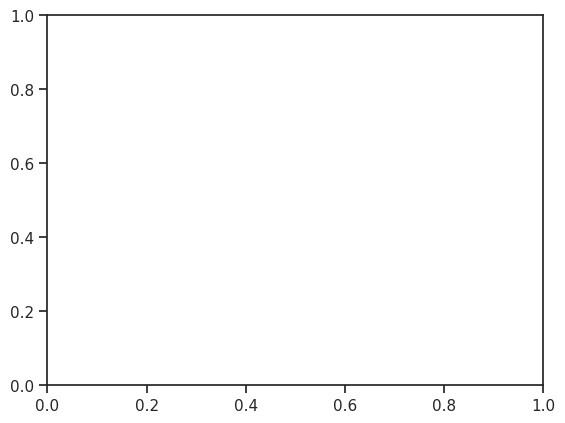

In [4]:
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_name = ['noop', 'sleep10ms', 'sleep100ms']

fig, ax = plt.subplots()

for monitor_tag in monitor_tags:
    df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
    # df = df.apply(lambda x: x.sort_values().iloc[1:-1])
    df = df.groupby('workers', as_index=False)['completion time']
    means = df.mean()
    print(means)
    standard_deviations = df.std()
    means.plot('workers', 'completion time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['completion time']), label=monitor_tag, ax=ax)

# plt.ylim(0.1)
plt.ylabel('completion time [s]')
plt.xlabel('number of workers')
# plt.savefig(f'{table_name}.pdf')
plt.legend(frameon=False)

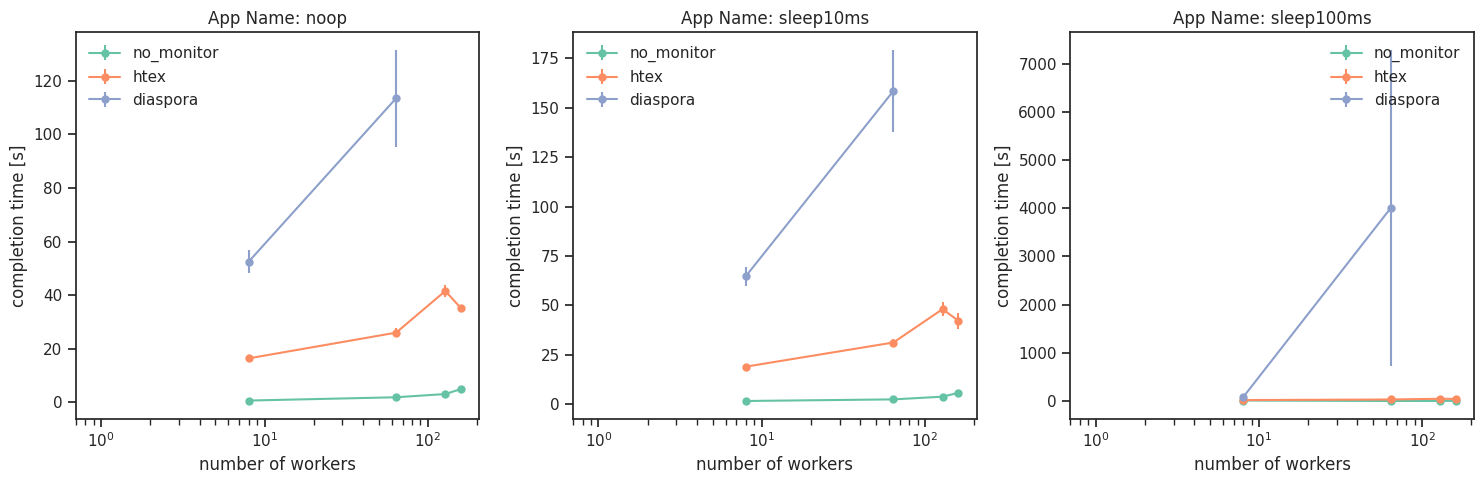

In [5]:
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['completion time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'completion time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['completion time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('completion time [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')